# <center>Logistic Regression Classifier<center>

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading the training and testing data

In [2]:
X_train = np.array([[0.346,0.780],[0.303,0.439],[0.358,0.729],[0.602,0.863],[0.790,0.753],[0.611,0.965]]).T
y_train = np.array([0,0,0,1,1,1]).reshape(1,X_train.shape[1])
X_test = np.array([[0.959,0.382],[0.750,0.306],[0.395,0.760],[0.823,0.764],[0.761,0.874],[0.844,0.435]]).T
y_test = np.array([0,0,0,1,1,1]).reshape(1,X_test.shape[1])

### Defining the Sigmoid function

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

### 5. a) Logistic Regression Classifier Code

In [4]:
def logistic_regression(X_train, y_train, alpha , iteration):
    
    m = X_train.shape[1] #number of rows
    n = X_train.shape[0] #number of columns
    
    W = np.array([[1.5],[0.5]])
    B = -1
    
    cost_values = []
    
    for i in range(iteration):
        
        temp = np.dot(W.T, X_train) + B
        y_cap = sigmoid(temp)
        
        cost = -(1/m)*np.sum( y_train*np.log(y_cap) + (1-y_train)*np.log(1-y_cap))
        
        dW = (1/m)*np.dot(y_cap-y_train, X_train.T)
        dB = (1/m)*np.sum(y_cap - y_train)
        
        W = W - alpha*dW.T
        B = B - alpha*dB
        
        cost_values.append(cost)
        
        if(i%(iteration/10) == 0):
            print("Cost after {}th iteration is {}".format(i,cost))
        
    return W, B, cost_values
    

### 5.b) i)

___

<img src='image.jpeg'/>
___

### 5.b) ii)

In [5]:
W, B, cost_values = logistic_regression(X_train, y_train, alpha = 0.1, iteration = 1)
print("Updated theta_0 value {}".format(B))
print("Updated theta_1 value {}".format(W[0]))
print("Updated theta_2 value {}".format(W[1]))

Cost after 0th iteration is 0.5569500797547651
Updated theta_0 value -1.0031662597725644
Updated theta_1 value [1.50535086]
Updated theta_2 value [0.50196867]


### Updated theta_0 value : -1.0031662597725644
### Updated theta_1 value : 1.50535086
### Updated theta_2 value : 0.50196867

### 5.b) iii)

In [6]:
# setting the number of iterations to 100000
W, B, cost_values = logistic_regression(X_train, y_train, alpha = 0.1, iteration = 100000)

Cost after 0th iteration is 0.5569500797547651
Cost after 10000th iteration is 0.062426112132501224
Cost after 20000th iteration is 0.03354618281751147
Cost after 30000th iteration is 0.023002502083890188
Cost after 40000th iteration is 0.017521224118343164
Cost after 50000th iteration is 0.014157704706260283
Cost after 60000th iteration is 0.011881735694500652
Cost after 70000th iteration is 0.010238564607786882
Cost after 80000th iteration is 0.008996144767935439
Cost after 90000th iteration is 0.008023610199246857


In [7]:
def get_accuracy(X_test, y_test, W, B):
    
    temp = np.dot(W.T, X_test) + B
    y_cap = sigmoid(temp)
    
    y_cap = y_cap >= 0.5
    y_cap = np.array(y_cap, dtype = 'int')
    
    accuracy = (1 - np.sum(abs(y_cap - y_test))/y_test.shape[1])*100
    
    print("Accuracy of the model is {} %".format(round(accuracy,2)))
    print("Prediction: {} ".format(y_cap))
    return y_cap

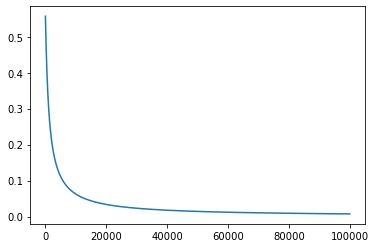

In [8]:
plt.plot(range(100000), cost_values)
plt.show()

In [9]:
y_cap = get_accuracy(X_test, y_test, W, B)

Accuracy of the model is 66.67 %
Prediction: [[1 1 0 1 1 1]] 


### Accuracy of the model is 66.67 %
### Prediction: [1 1 0 1 1 1]


In [10]:
def get_TP_TN_FP_FN_class1(y_test,y_cap):
    
    TP = np.sum((y_test == 1) & (y_cap == 1))
    TN = np.sum((y_test == 0) & (y_cap == 0))
    FP = np.sum((y_test == 0) & (y_cap == 1))
    FN = np.sum((y_test == 1) & (y_cap == 0))
    
    return TP, TN, FP, FN

def get_TP_TN_FP_FN_class0(y_test,y_cap):
    
    TP = np.sum((y_test == 0) & (y_cap == 0))
    TN = np.sum((y_test == 1) & (y_cap == 1))
    FP = np.sum((y_test == 1) & (y_cap == 0))
    FN = np.sum((y_test == 0) & (y_cap == 1))
    
    return TP, TN, FP, FN

def get_precision(TP,FP):
    return TP / float( TP + FP) 

def get_recall(TP, FN):
    return TP / float( TP + FN) 

TP, TN, FP, FN = get_TP_TN_FP_FN_class0(y_test,y_cap)

print('Precision of the model for class 0 : {}'.format(get_precision(TP, FP)))
print('Recall of the model for class 0 : {}'.format(get_recall(TP, FN)))

TP, TN, FP, FN = get_TP_TN_FP_FN_class1(y_test,y_cap)
print('\n')

print('Precision of the model for class 1 : {}'.format(get_precision(TP, FP)))
print('Recall of the model for class 1 : {}'.format(get_recall(TP, FN)))

Precision of the model for class 0 : 1.0
Recall of the model for class 0 : 0.3333333333333333


Precision of the model for class 1 : 0.6
Recall of the model for class 1 : 1.0


### Precision of the model for class 0 : 1.00
### Recall of the model for class 0 : 0.33


### Precision of the model for class 1 : 0.60
### Recall of the model for class 1 : 1.00

### We can confirm our results using sklearn's classification report function

In [11]:
from sklearn.metrics import classification_report,accuracy_score

y_test = y_test.reshape((6,))
y_cap = y_cap.reshape((6,))

print(classification_report(y_test,y_cap))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.60      1.00      0.75         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6

